# <center>TSF TASK 2 - GRIP MARCH'21</center>
# <center>ADITYA AMBWANI<center>

# <center>Prediction Using Unsupervised ML<center>

### Aim:- From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

[The Sparks Foundation](https://www.thesparksfoundationsingapore.org/)
[GRIP MARCH'21](https://www.linkedin.com/company/the-sparks-foundation/)

Step 1 - Importing Libraries

In [1]:
import pandas as pan
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

Step 2 - Load the iris dataset

In [2]:
data = load_iris()
data_x_df= pan.DataFrame(ny.column_stack((data.data, data.target)), columns = data.feature_names+['target'])
data_x_df['label'] = data_x_df.target.replace(dict(enumerate(data.target_names)))
data_x_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [3]:
# Viewing the last 5 rows of our dataset
data_x_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica
149,5.9,3.0,5.1,1.8,2.0,virginica


Step 3 - Calulating number of rows and coloumns

In [4]:
data_x_df.shape

(150, 6)

Step 4 - Checking for any null value in our dataset

In [5]:
data_x_df.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


Step 5 - Checking for some more information on our dataset

In [6]:
data_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
 5   label              150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


Step 6 - Using seaborn to plot the pair plot

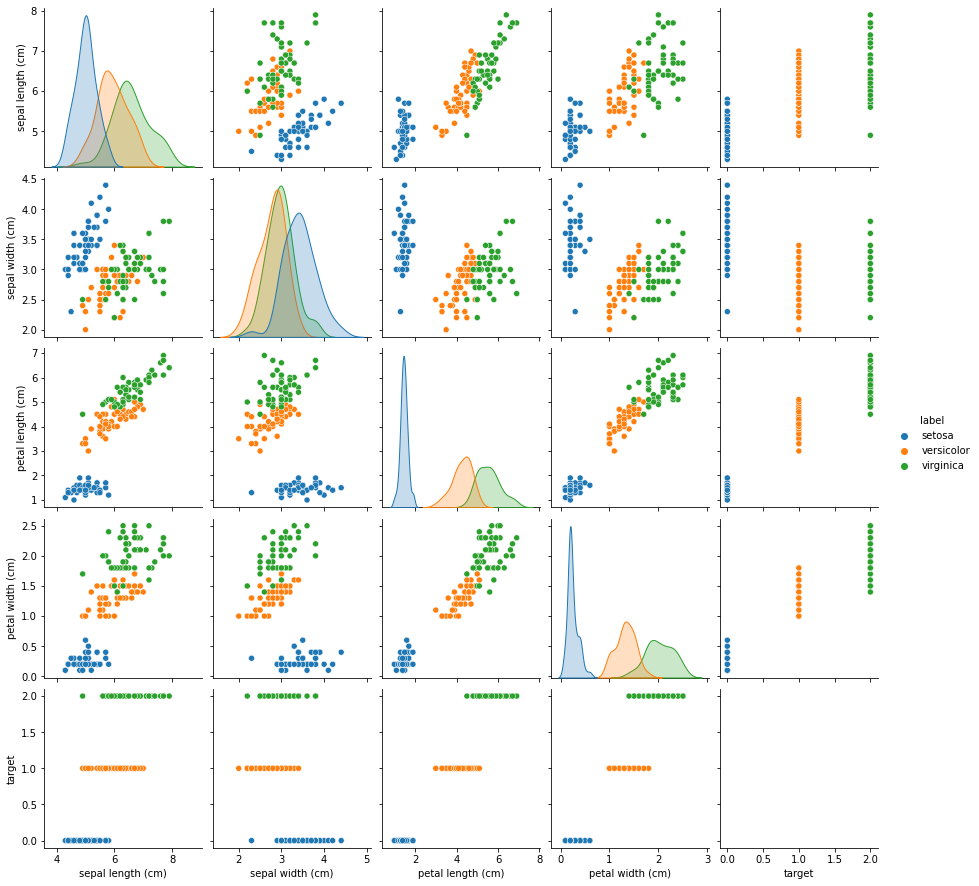

In [7]:
sns.pairplot(data_x_df, hue='label')

Step 7 - Plotting te correlation matrix

<AxesSubplot:>

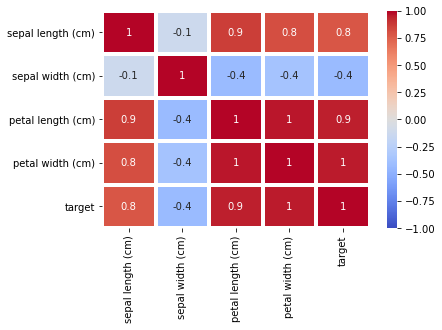

In [8]:
sns.heatmap(data_x_df.corr(),annot=True,fmt='.1g',cmap='coolwarm',vmin=-1,vmax=1,linewidth='3')

Step 8 - 'ELBOW' method to find optimum number of clusters

In [9]:
x = data_x_df.iloc[:,[0,1,2,3]].values
wcs = [] 
for i in range(1, 21):
    model = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 250, n_init = 15, random_state = 0)
    model.fit(x)
    wcs.append(model.inertia_)
print(wcs)

[681.3705999999996, 152.34795176035797, 78.851441426146, 57.25600931571815, 46.44618205128204, 39.03998724608725, 34.29822966507179, 30.014398496240617, 28.03690635345049, 26.534529220779234, 24.017409798327492, 22.611814560232254, 21.29261112885971, 20.29775001774859, 19.211721918432456, 18.147461141799383, 17.35341513878279, 16.44187692862693, 15.628506387403455, 14.667646358543427]


Step 9 - Plotting the elbow graph

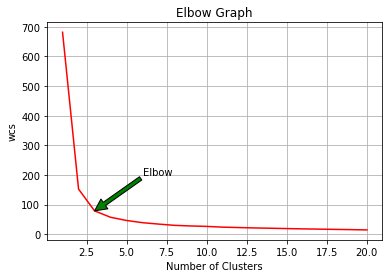

In [10]:
plt.plot(range(1, 21), wcs, color = 'r')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcs')
plt.annotate('Elbow', xytext=(6,200), xy=(3,79), arrowprops={'facecolor':'green'})
plt.grid() 
plt.show()

Elbow occurs where the line graph bends and wcs does not decrease significantly with every iteration.
Elbow occurs at number of clusters = 3 which is equal to optimum number of clusters.

Step 10 - Creating kmeans classifier

In [11]:
model = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 250, n_init = 15, random_state = 0)
y = model.fit_predict(x)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


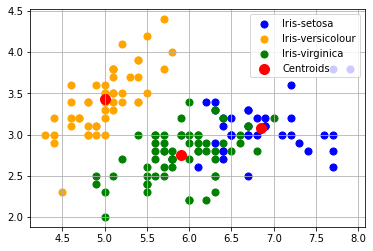

In [12]:
# Plotting the three clusters of first two columns(sepal length, sepal width)
plt.scatter(x[y == 0, 0], x[y == 0, 1], 
            s = 50, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], 
            s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of each clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')
plt.legend(loc=1)
plt.grid()